In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()
import math

In [29]:
data = pd.read_csv("StudentsPerformance.csv")

In [30]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [31]:
df = data.rename(columns = {"gender" : "Cinsiyet",
                           "race/ethnicity" : "Irk",
                           "parental level of education" : "EbeveynEgitimSeviyesi",
                           "lunch" : "OgleYemegi",
                           "test preparation course" : "SinavaHazirlikKursu",
                           "math score" : "MatematikSkor",
                           "reading score" : "OkumaSkor",
                           "writing score" : "YazmaSkor"})

In [32]:
df.head()

,Cinsiyet,Irk,EbeveynEgitimSeviyesi,OgleYemegi,SinavaHazirlikKursu,MatematikSkor,OkumaSkor,YazmaSkor
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [33]:
df.isnull().sum()

Cinsiyet                 0
Irk                      0
EbeveynEgitimSeviyesi    0
OgleYemegi               0
SinavaHazirlikKursu      0
MatematikSkor            0
OkumaSkor                0
YazmaSkor                0
dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Cinsiyet               1000 non-null   object
 1   Irk                    1000 non-null   object
 2   EbeveynEgitimSeviyesi  1000 non-null   object
 3   OgleYemegi             1000 non-null   object
 4   SinavaHazirlikKursu    1000 non-null   object
 5   MatematikSkor          1000 non-null   int64 
 6   OkumaSkor              1000 non-null   int64 
 7   YazmaSkor              1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [35]:
print(df["Cinsiyet"].value_counts())
print("\n------\n")
print(df["Irk"].value_counts())
print("\n------\n")
print(df["EbeveynEgitimSeviyesi"].value_counts())
print("\n------\n")
print(df["OgleYemegi"].value_counts())
print("\n------\n")
print(df["SinavaHazirlikKursu"].value_counts())
print("\n------\n")
print(df["MatematikSkor"].value_counts())
print("\n------\n")
print(df["OkumaSkor"].value_counts())
print("\n------\n")
print(df["YazmaSkor"].value_counts())
print("\n------\n")


female    518
male      482
Name: Cinsiyet, dtype: int64

------

group C    319
group D    262
group B    190
group E    140
group A     89
Name: Irk, dtype: int64

------

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: EbeveynEgitimSeviyesi, dtype: int64

------

standard        645
free/reduced    355
Name: OgleYemegi, dtype: int64

------

none         642
completed    358
Name: SinavaHazirlikKursu, dtype: int64

------

65    36
62    35
59    32
69    32
73    27
      ..
22     1
19     1
18     1
8      1
0      1
Name: MatematikSkor, Length: 81, dtype: int64

------

72    34
74    33
64    32
73    30
67    30
      ..
32     1
28     1
26     1
23     1
17     1
Name: OkumaSkor, Length: 72, dtype: int64

------

74    35
70    33
68    31
73    28
62    27
      ..
23     1
22     1
19     1
15     1
10     1
Name: YazmaSkor, Length: 77, dtype: int64

------



In [36]:
sirali = np.sort(df.YazmaSkor)
max_deger = np.max(sirali)
min_deger = np.min(sirali)
DG = max_deger - min_deger
k = math.ceil(np.sqrt(303))
a = 1
c = (DG+a)/k
print(c)

5.055555555555555


In [37]:
s_alt = np.zeros((k, 1), dtype=np.float)
s_ust = np.zeros((k, 1), dtype=np.float)
s_alt[0] = min_deger
s_ust[0] = s_alt[1]-0.01
for i in range(1, k):
    s_alt[i] = (s_alt[i-1] + c)
s_ust[:] = s_alt[:] + (c-0.01)

In [38]:
#Sınıf orta degeleri bulma
s_ort = np.zeros((k, 1), dtype=np.float)
for i in range(k):
    s_ort[i] = (s_alt[i] + s_ust[i]) / 2

In [39]:
for i in df.YazmaSkor:
    for j in range(k):
        if((s_alt[j]<i) & (i<s_ust[j])):
            z = s_ort[j]
            df.loc[df.YazmaSkor == i, "YazmaSkor"] = int(z)

In [40]:
df.YazmaSkor.value_counts()

68    136
73    128
78    120
63    107
52     93
83     87
58     84
88     53
47     47
42     42
93     42
98     26
37     17
32      8
27      5
22      2
17      1
12      1
10      1
Name: YazmaSkor, dtype: int64

In [41]:
sirali = np.sort(df.OkumaSkor)
max_deger = np.max(sirali)
min_deger = np.min(sirali)
DG = max_deger - min_deger
k = math.ceil(np.sqrt(303))
a = 1
c = (DG+a)/k
print(c)

4.666666666666667


In [42]:
s_alt = np.zeros((k, 1), dtype=np.float)
s_ust = np.zeros((k, 1), dtype=np.float)
s_alt[0] = min_deger
s_ust[0] = s_alt[1]-0.1
for i in range(1, k):
    s_alt[i] = (s_alt[i-1] + c)
s_ust[:] = s_alt[:] + (c-0.1)

In [43]:
#Sınıf orta degeleri bulma
s_ort = np.zeros((k, 1), dtype=np.float)
for i in range(k):
    s_ort[i] = (s_alt[i] + s_ust[i]) / 2

In [44]:
for i in df.OkumaSkor:
    for j in range(k):
        if((s_alt[j]<i) & (i<s_ust[j])):
            z = s_ort[j]
            df.loc[df.OkumaSkor == i, "OkumaSkor"] = int(z)

In [45]:
df.OkumaSkor.value_counts()

65    131
75    108
79    105
61    104
70     95
56     77
84     77
51     70
89     44
93     31
47     30
73     30
42     26
98     25
87     13
37     12
45      7
33      5
23      4
28      3
31      2
17      1
Name: OkumaSkor, dtype: int64

In [47]:
sirali = np.sort(df.MatematikSkor)
max_deger = np.max(sirali)
min_deger = np.min(sirali)
DG = max_deger - min_deger
k = math.ceil(np.sqrt(303))
a = 1
c = (DG+a)/k
print(c)

5.611111111111111


In [48]:
s_alt = np.zeros((k, 1), dtype=np.float)
s_ust = np.zeros((k, 1), dtype=np.float)
s_alt[0] = min_deger
s_ust[0] = s_alt[1]-0.01
for i in range(1, k):
    s_alt[i] = (s_alt[i-1] + c)
s_ust[:] = s_alt[:] + (c-0.01)

In [49]:
#Sınıf orta degeleri bulma
s_ort = np.zeros((k, 1), dtype=np.float)
for i in range(k):
    s_ort[i] = (s_alt[i] + s_ust[i]) / 2

In [50]:
for i in df.MatematikSkor:
    for j in range(k):
        if((s_alt[j]<i) & (i<s_ust[j])):
            z = s_ort[j]
            df.loc[df.MatematikSkor == i, "MatematikSkor"] = int(z)

In [51]:
df.MatematikSkor.value_counts()

64    167
75    132
70    120
58    118
53     98
81     98
47     74
86     59
42     36
92     36
98     22
36     20
30      9
25      6
19      3
8       1
0       1
Name: MatematikSkor, dtype: int64

In [52]:
df.loc[df.SinavaHazirlikKursu == "none", "SinavaHazirlikKursu"] = "Tamamlanmadi"
df.loc[df.SinavaHazirlikKursu == "completed", "SinavaHazirlikKursu"] = "Tamamlandi"

df.loc[df.EbeveynEgitimSeviyesi == "some college", "EbeveynEgitimSeviyesi"] = "Universite"
df.loc[df.EbeveynEgitimSeviyesi == "associate's degree", "EbeveynEgitimSeviyesi"] = "Onlisans"
df.loc[df.EbeveynEgitimSeviyesi == "high school", "EbeveynEgitimSeviyesi"] = "Lise"
df.loc[df.EbeveynEgitimSeviyesi == "some high school", "EbeveynEgitimSeviyesi"] = "Lise"
df.loc[df.EbeveynEgitimSeviyesi == "bachelor's degree", "EbeveynEgitimSeviyesi"] = "Lisans"
df.loc[df.EbeveynEgitimSeviyesi == "master's degree ", "EbeveynEgitimSeviyesi"] = "YuksekLisans"

df.loc[df.OgleYemegi == "standard", "OgleYemegi"] = "standart"
df.loc[df.OgleYemegi == "free/reduced", "OgleYemegi"] = "ucretsiz"

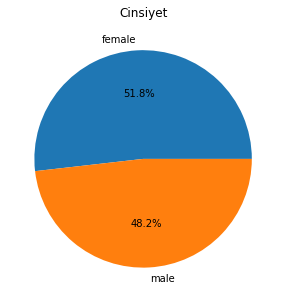

In [53]:
fig = plt.figure(figsize=(20,5))
df.Cinsiyet.value_counts().plot(kind = 'pie',autopct='%.1f%%')
plt.ylabel("", fontsize = 20)
plt.title("Cinsiyet");

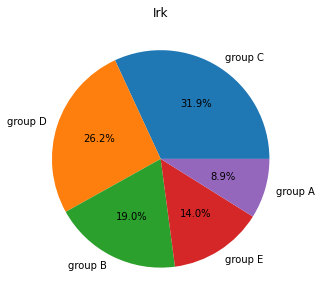

In [54]:
fig = plt.figure(figsize=(20,5))
df.Irk.value_counts().plot(kind = 'pie',autopct='%.1f%%')
plt.ylabel("", fontsize = 20)
plt.title("Irk");

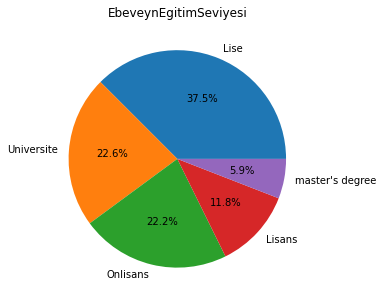

In [55]:
fig = plt.figure(figsize=(20,5))
df.EbeveynEgitimSeviyesi.value_counts().plot(kind = 'pie',autopct='%.1f%%')
plt.ylabel("", fontsize = 20)
plt.title("EbeveynEgitimSeviyesi");

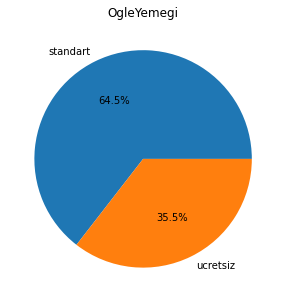

In [56]:
fig = plt.figure(figsize=(20,5))
df.OgleYemegi.value_counts().plot(kind = 'pie',autopct='%.1f%%')
plt.ylabel("", fontsize = 20)
plt.title("OgleYemegi");

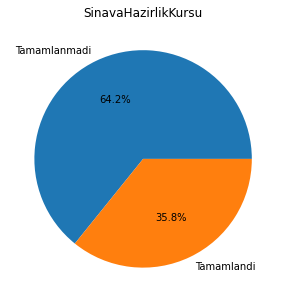

In [57]:
fig = plt.figure(figsize=(20,5))
df.SinavaHazirlikKursu.value_counts().plot(kind = 'pie',autopct='%.1f%%')
plt.ylabel("", fontsize = 20)
plt.title("SinavaHazirlikKursu");

In [92]:
df.head()

,Cinsiyet,Irk,EbeveynEgitimSeviyesi,OgleYemegi,SinavaHazirlikKursu,MatematikSkor,OkumaSkor,YazmaSkor
0,0,1,0,0,0,70,13,73
1,0,2,3,0,1,70,19,88
2,0,1,4,0,0,92,20,93
3,1,0,2,1,0,47,10,42
4,1,2,3,0,0,75,16,73


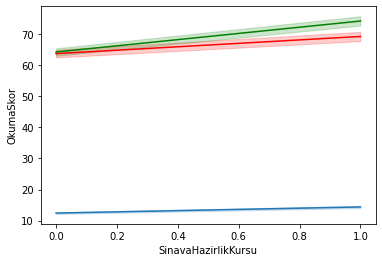

In [97]:
sns.lineplot(x="SinavaHazirlikKursu", y="MatematikSkor", color = "red", data=df);
sns.lineplot(x="SinavaHazirlikKursu", y="YazmaSkor", color = "green", data=df);
sns.lineplot(x="SinavaHazirlikKursu", y="OkumaSkor", data=df);

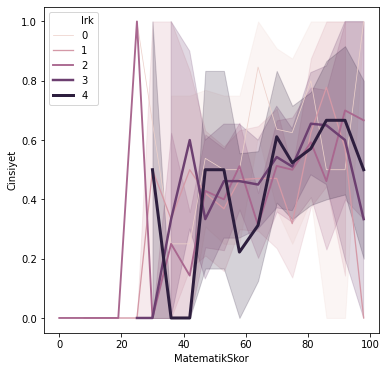

In [106]:
plt.figure(figsize=(6, 6))
sns.lineplot(
    data=df, x="MatematikSkor", y="Cinsiyet",
    size="Irk", hue="Irk",
    legend="full"
);

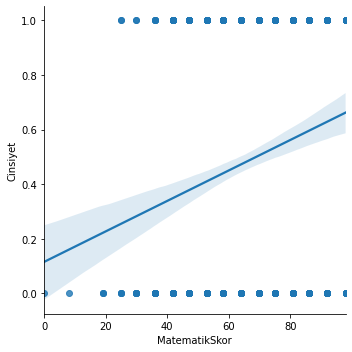

In [107]:
sns.lmplot(x="MatematikSkor", y="Cinsiyet", data=df);

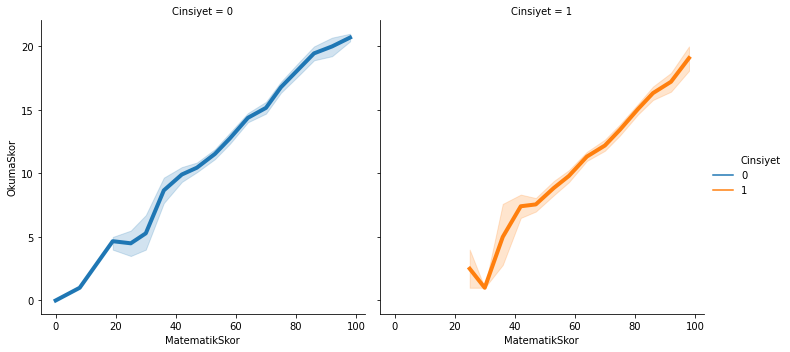

In [108]:
sns.relplot(
    data=df,
    x="MatematikSkor", y="OkumaSkor", col="Cinsiyet", hue="Cinsiyet",
    kind="line",linewidth=4, zorder=5,
  
); # 0 : Kadın, 1 : Erkek

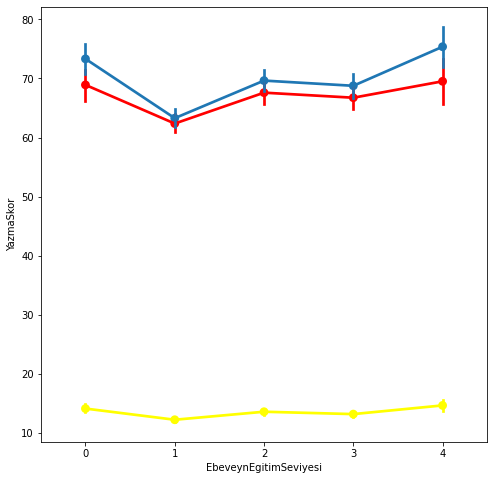

In [119]:
plt.figure(figsize=(8,8))
sns.pointplot(x="EbeveynEgitimSeviyesi", y="MatematikSkor", color = "red", data=df);
sns.pointplot(x="EbeveynEgitimSeviyesi", y="OkumaSkor", color = "yellow", data=df);
sns.pointplot(x="EbeveynEgitimSeviyesi", y="YazmaSkor", data=df);

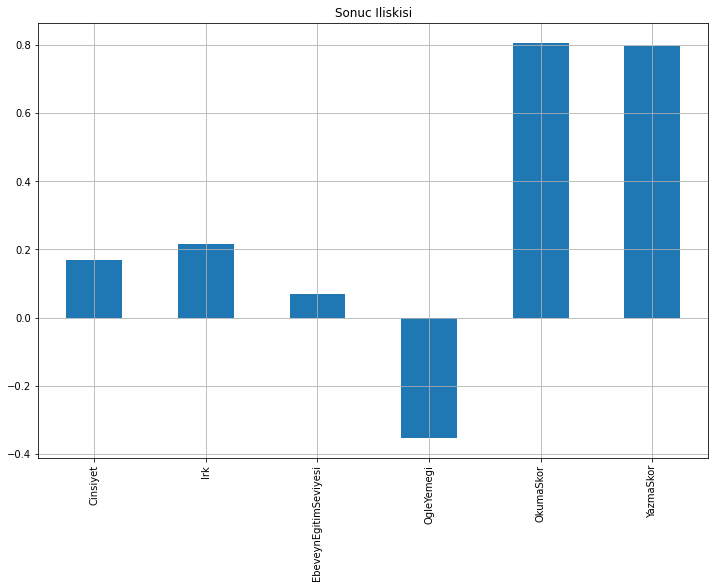

In [121]:
X = df.drop("MatematikSkor", axis =1)
Y = df["MatematikSkor"]
X.corrwith(df.MatematikSkor).plot(kind='bar',
                           grid=True, 
                           figsize=(12, 8),
                           title="Sonuc Iliskisi");

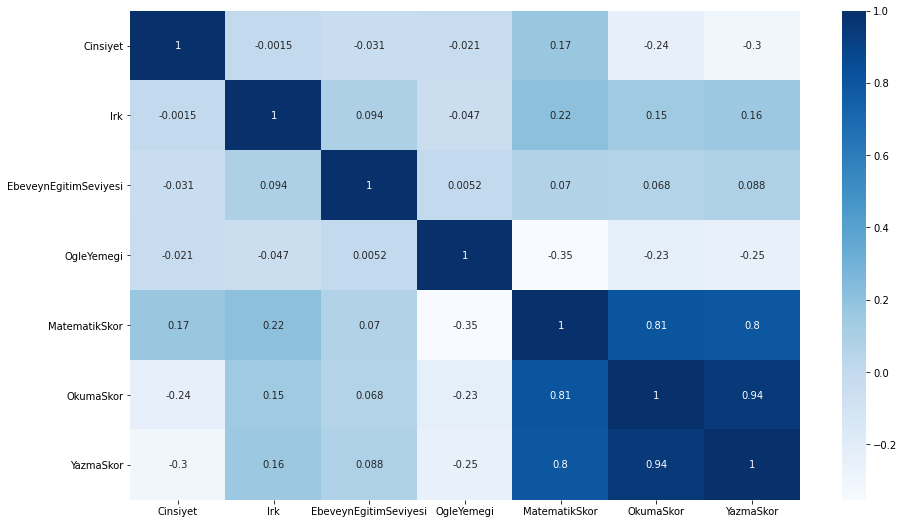

In [125]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),cmap='Blues',annot=True);

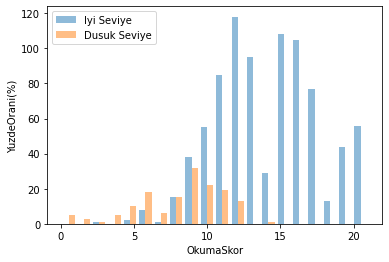

In [129]:
plt.hist([df[df.MatematikSkor>=50].OkumaSkor, df[df.MatematikSkor<50].OkumaSkor], bins = 20, alpha = 0.5, label = ["Iyi Seviye","Dusuk Seviye"])
plt.xlabel("OkumaSkor")
plt.ylabel("YuzdeOrani(%)")
plt.legend()
plt.show() 

In [61]:
import seaborn as sns

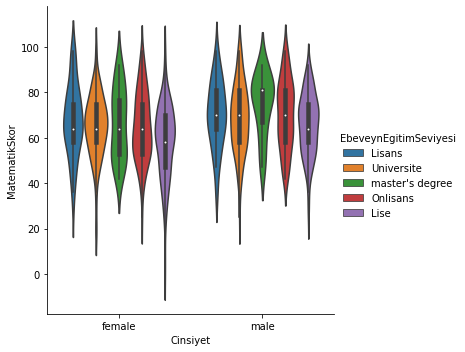

In [62]:
sns.catplot(x="Cinsiyet", y="MatematikSkor", kind="violin", data = df, hue="EbeveynEgitimSeviyesi");

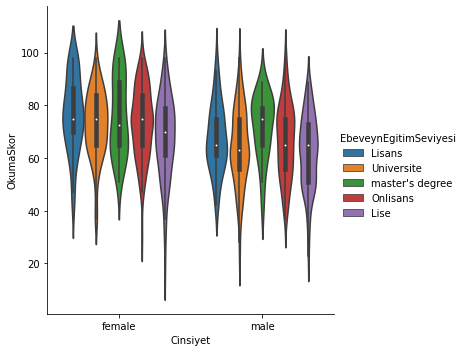

In [63]:
sns.catplot(x="Cinsiyet", y="OkumaSkor", kind="violin", data = df, hue="EbeveynEgitimSeviyesi");

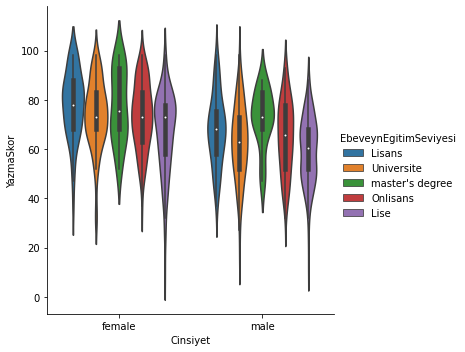

In [64]:
sns.catplot(x="Cinsiyet", y="YazmaSkor", kind="violin", data = df, hue="EbeveynEgitimSeviyesi");

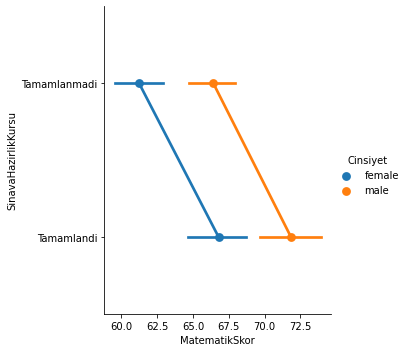

In [65]:
sns.catplot(x="MatematikSkor", y="SinavaHazirlikKursu", kind="point", hue="Cinsiyet", data=df)

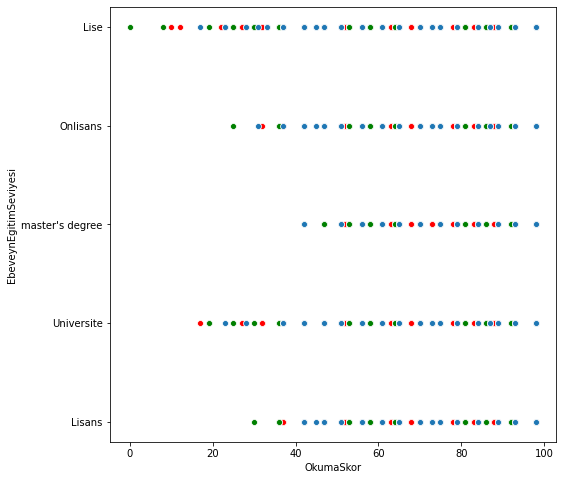

In [66]:
plt.figure(figsize = (8, 8))
sns.scatterplot(x="YazmaSkor", y="EbeveynEgitimSeviyesi", data=df, color="red");
sns.scatterplot(x="MatematikSkor", y="EbeveynEgitimSeviyesi", data=df,color="green");
sns.scatterplot(x="OkumaSkor", y="EbeveynEgitimSeviyesi", data=df);

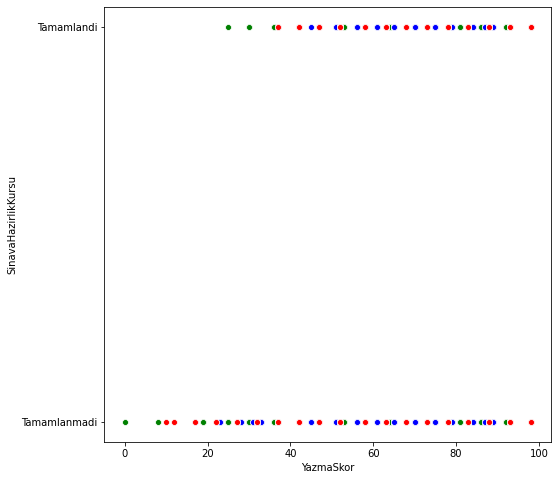

In [67]:
plt.figure(figsize = (8, 8))
sns.scatterplot(x="MatematikSkor", y="SinavaHazirlikKursu", data=df,color="green");
sns.scatterplot(x="OkumaSkor", y="SinavaHazirlikKursu", data=df,color="blue");
sns.scatterplot(x="YazmaSkor", y="SinavaHazirlikKursu", data=df,color="red");

In [68]:
df["Cinsiyet"] = lbe.fit_transform(df["Cinsiyet"])
df["OgleYemegi"] = lbe.fit_transform(df["OgleYemegi"])
df["EbeveynEgitimSeviyesi"] = lbe.fit_transform(df["EbeveynEgitimSeviyesi"])
df["Irk"] = lbe.fit_transform(df["Irk"])

In [69]:
df.loc[df.SinavaHazirlikKursu == "Tamamlanmadi", "SinavaHazirlikKursu"] = 0
df.loc[df.SinavaHazirlikKursu == "Tamamlandi", "SinavaHazirlikKursu"] = 1

In [70]:
df.head()

,Cinsiyet,Irk,EbeveynEgitimSeviyesi,OgleYemegi,SinavaHazirlikKursu,MatematikSkor,OkumaSkor,YazmaSkor
0,0,1,0,0,0,70,70,73
1,0,2,3,0,1,70,89,88
2,0,1,4,0,0,92,93,93
3,1,0,2,1,0,47,56,42
4,1,2,3,0,0,75,79,73


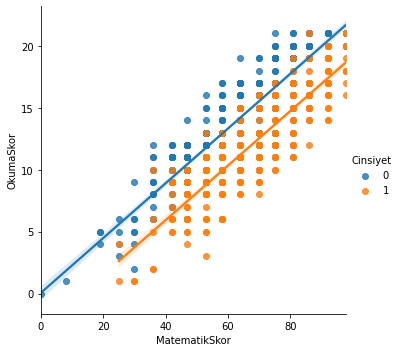

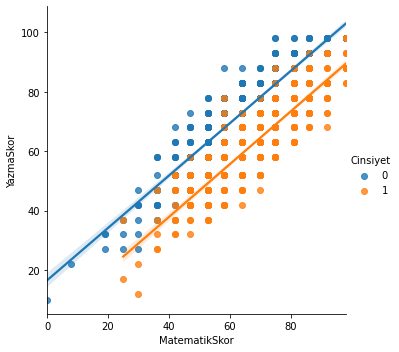

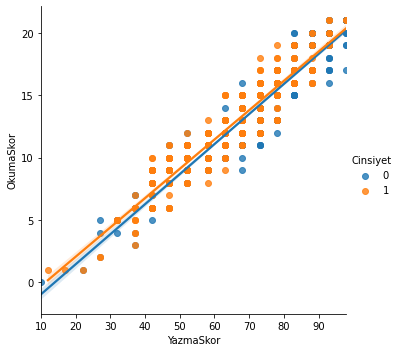

In [132]:
sns.lmplot(x="MatematikSkor", y="OkumaSkor", data=df, hue="Cinsiyet");
sns.lmplot(x="MatematikSkor", y="YazmaSkor", data=df, hue="Cinsiyet");
sns.lmplot(x="YazmaSkor", y="OkumaSkor", data=df, hue="Cinsiyet");

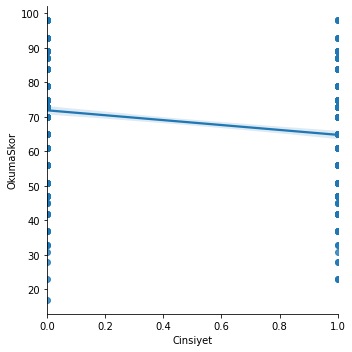

In [72]:
sns.lmplot(x="Cinsiyet", y="OkumaSkor", data=df);

In [73]:
df["OkumaSkor"]=lbe.fit_transform(df["OkumaSkor"])
df["OkumaSkor"]=lbe.fit_transform(df["OkumaSkor"])
df["OkumaSkor"]=lbe.fit_transform(df["OkumaSkor"])

In [74]:
# ML

In [75]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

In [76]:
y = df["MatematikSkor"]
x = df.drop("MatematikSkor", axis=1)

In [77]:
y.head()

0    70
1    70
2    92
3    47
4    75
Name: MatematikSkor, dtype: int64

In [78]:
x.head()

,Cinsiyet,Irk,EbeveynEgitimSeviyesi,OgleYemegi,SinavaHazirlikKursu,OkumaSkor,YazmaSkor
0,0,1,0,0,0,13,73
1,0,2,3,0,1,19,88
2,0,1,4,0,0,20,93
3,1,0,2,1,0,10,42
4,1,2,3,0,0,16,73


In [79]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [80]:
model = Ridge().fit(X_train, y_train)

In [81]:
y_pred = model.predict(X_test)

In [82]:
y_pred

array([75.68163483, 56.32955897, 79.3897191 , 76.23012853, 84.57928517,
       80.0615774 , 64.34678473, 52.65950515, 74.94722597, 50.22120847,
       49.98459877, 32.92320256, 67.47373717, 54.4821766 , 85.4613248 ,
       72.74139517, 54.37021715, 49.48077097, 48.92688496, 54.48487276,
       74.26458305, 40.71898731, 56.73311806, 37.2077944 , 78.86197797,
       83.66812102, 78.18742351, 49.37923033, 31.77318701, 48.91278366,
       64.86913354, 70.03874468, 61.2706784 , 78.92658911, 81.49778653,
       42.36823594, 78.34898058, 70.94010292, 68.39425276,  6.44895466,
       80.34966953, 66.6704258 , 70.04683315, 57.30964546, 80.920178  ,
       61.14756777, 71.49668509, 22.82056048, 89.32351324, 67.25152808,
       73.52002513, 67.94460356, 81.63257208, 44.76377498, 65.83114381,
       67.9419074 , 87.95730756, 59.53335484, 81.58000853, 80.10291078,
       45.53385515, 72.5880886 , 70.11224189, 54.53365903, 88.70707667,
       67.02139181, 58.76597084, 55.92950738, 56.70507464, 83.36

In [83]:
np.sqrt(mean_squared_error(y_test, y_pred))

5.79103803471767

In [84]:
lambdalar1 = np.random.randint(0, 1000, 100)

In [85]:
ridge_cv = RidgeCV(alphas = lambdalar1, scoring="neg_mean_squared_error", cv=10, normalize=True)

In [86]:
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([689,  38, 321, 402, 271, 591, 375, 802, 157,  22, 634, 359,  65,
       732, 677,  28, 715, 842, 651, 970, 109, 302, 151, 270,   4, 218,
       294,  15, 464, 594, 209, 999, 489, 398, 383, 850, 900, 130, 938,
       856, 971, 119, 530, 706, 521,  94, 594, 124, 766, 150, 588, 789,
       811, 987, 728, 366, 173, 275, 199, 691, 636, 544, 101, 735, 614,
       922, 853, 203, 336, 735, 711, 100, 888, 589, 881,  25, 806,  78,
       735, 612, 406, 722, 339, 619, 660, 988, 896, 540, 156, 962, 339,
       652, 817,  90, 584, 107, 657, 877, 901,   4]),
        cv=10, normalize=True, scoring='neg_mean_squared_error')

In [87]:
ridge_cv.alpha_

4

In [88]:
ridge_tuned = Ridge(alpha=ridge_cv.alpha_).fit(X_train, y_train)

In [89]:
y_pred = ridge_tuned.predict(X_test)

In [90]:
np.sqrt(mean_squared_error(y_test, y_pred))

5.802244237457876

In [91]:
print(y_test[0:5])
print("\n")
print(y_pred[0:5])

521    92
737    53
740    81
660    75
411    81
Name: MatematikSkor, dtype: int64


[75.71330053 56.47103488 79.21640529 76.10187914 84.48518712]
